In [2]:

import os

import numpy as np
import torch
import torch.optim as optim
from torch.utils.data import DataLoader,random_split
import torch.nn as nn
from PIL import Image
from network import *
from dataset import *


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        
    ]
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NestedUNet(num_classes=1,input_channels=1, deep_supervision=False)
#model = UNet(input_channels=1,num_classes=1,bilinear=True)

model.load_state_dict(torch.load("/workspace/dir_checkpoint/CP_epoch1.pth"))
model.to(device)

path = "/workspace/eval/input"
png_list = os.listdir(path=path)
path_list = sorted([path+"/"+f for f in png_list])
print(path_list[0][23:])

for f in path_list:
    img = cv2.cvtColor(np.array(Image.open(f)),cv2.COLOR_BGR2GRAY)

    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    output = model(img)
    output = output.to('cpu').detach().numpy()
    output = output.squeeze()
    plt.imsave("/workspace/eval/test_result/"+f[23:],output)



6129_1.png


In [3]:
input_path = "/workspace/eval/input"
label_path = "/workspace/eval/test_result"
GT_path = "/workspace/eval/target"

input_pathlist = [input_path + "/" + f for f in os.listdir(input_path)]
label_pathlist = [label_path + "/" + f for f in os.listdir(label_path)]
GT_pathlist = [GT_path + "/" + f for f in os.listdir(GT_path)]

In [4]:
input = input_pathlist
label = label_pathlist
GT = GT_pathlist
len(input), len(label),len(GT)

(1563, 1563, 1563)

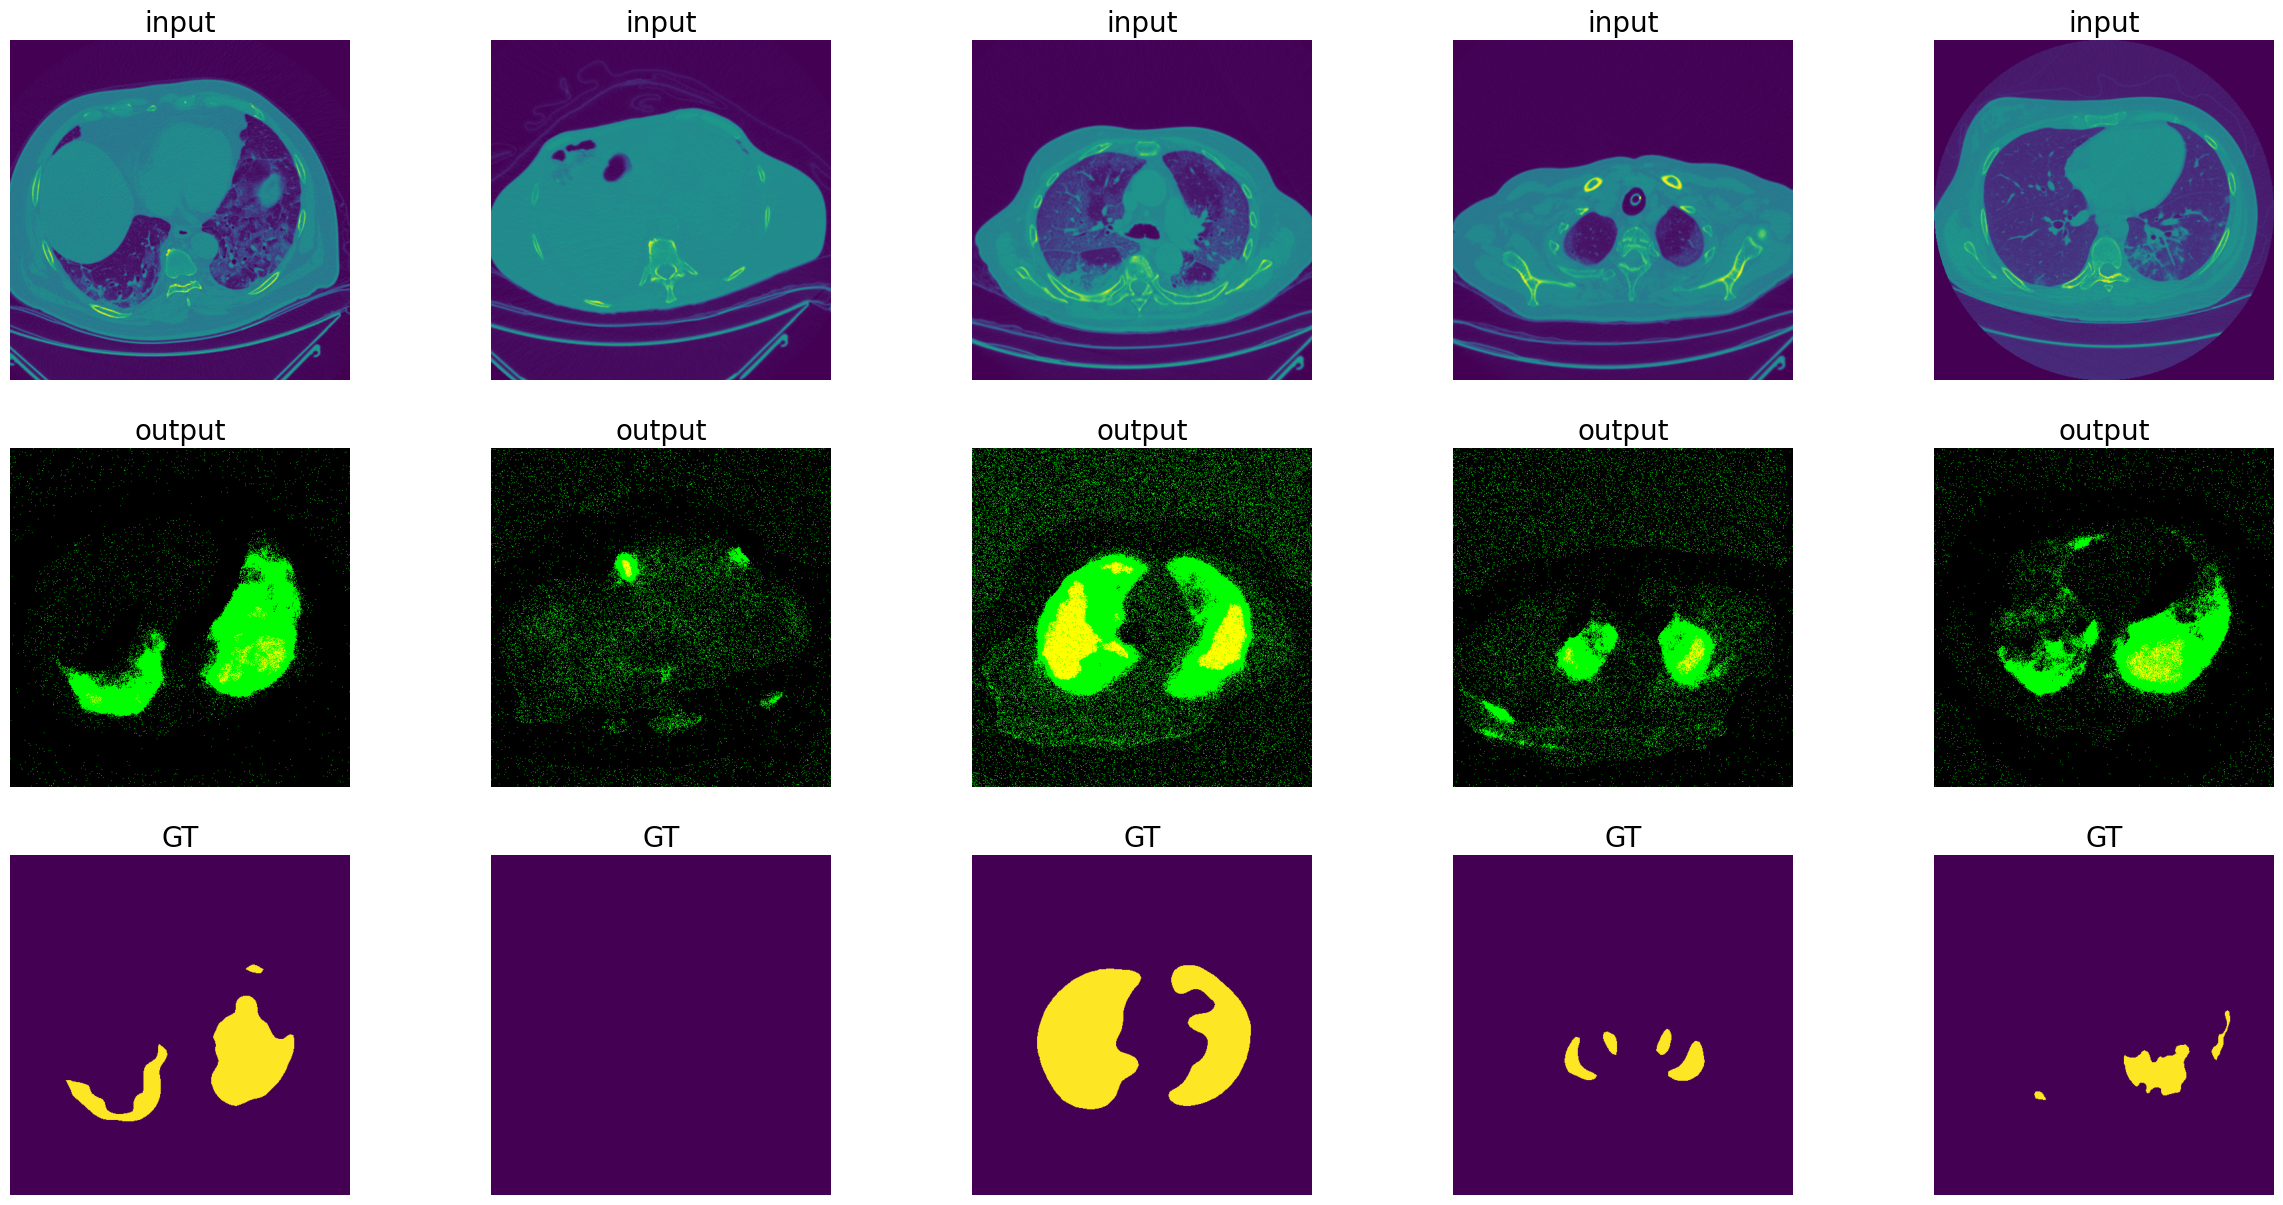

In [7]:
plt.figure(figsize=(30,15))
start=100
for i in range(start,start+5):
    i=i-start+1
    plt.subplot(3,5,i)
    plt.imshow(np.array(Image.open(input[i-1])))
    plt.title('input',fontdict={'fontsize': 20})
    plt.axis('off')
    
    result_img = np.array(Image.open(label[i-1]))/255
    thresh = np.zeros_like(result_img)

    thresh[result_img > 0.8] = 1
    
    plt.subplot(3,5,5+i)
    plt.imshow(thresh)
    plt.title('output',fontdict={'fontsize': 20})
    plt.axis('off')

    plt.subplot(3,5,10+i)
    plt.imshow(np.array(Image.open(GT[i-1])))
    plt.title('GT',fontdict={'fontsize': 20})
    plt.axis('off')

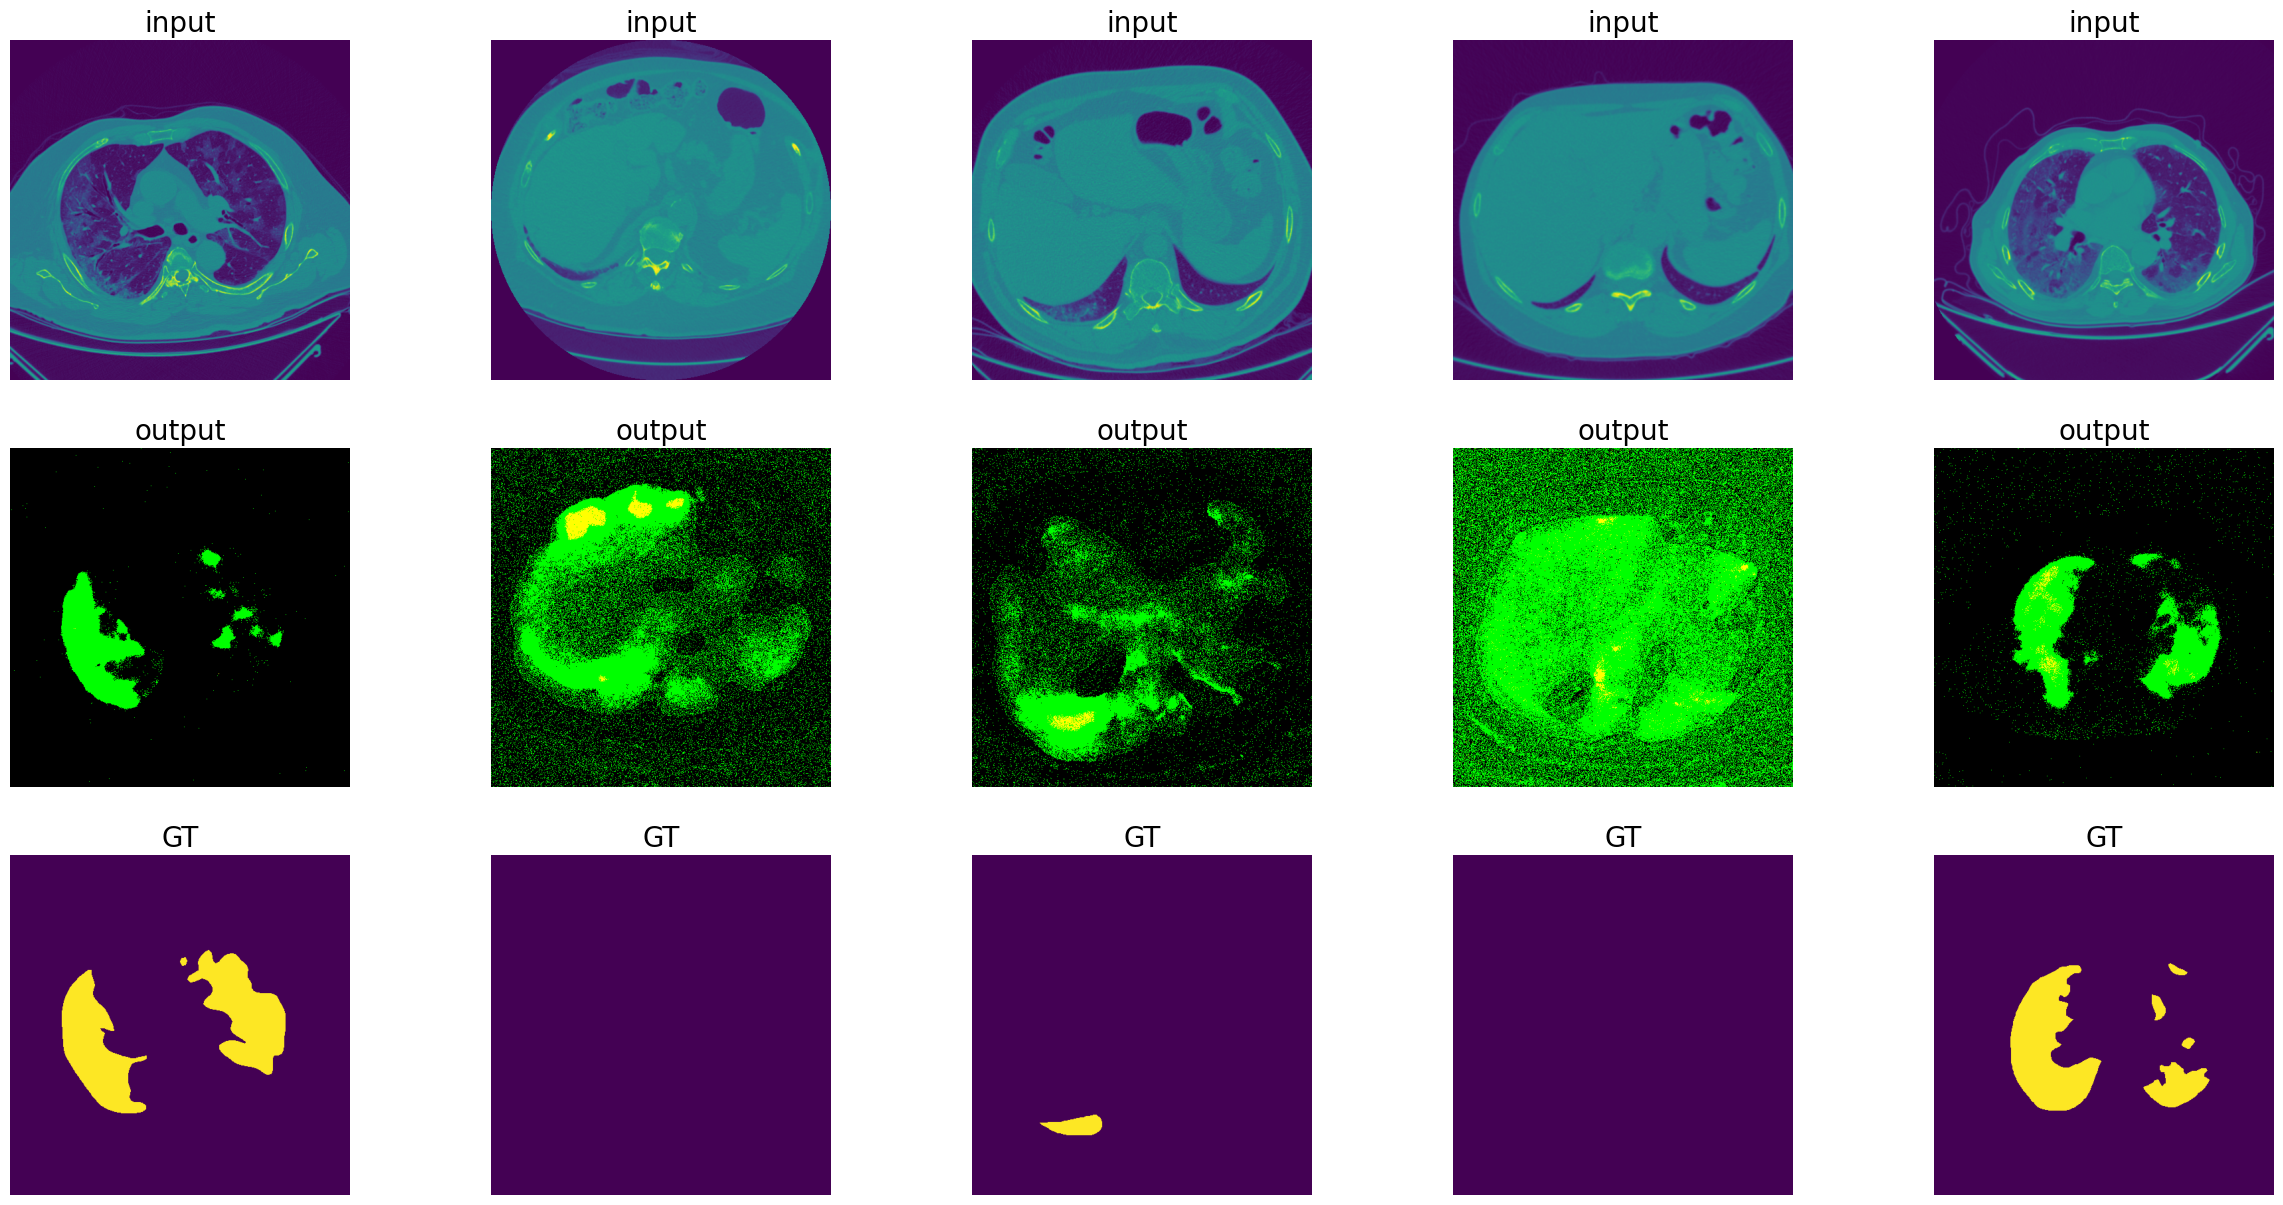

In [10]:
plt.figure(figsize=(30,15))
for i in range(start,start+5):
    i=i-start+1
    plt.subplot(3,5,i)
    plt.imshow(np.array(Image.open(input[i+4])))
    plt.title('input',fontdict={'fontsize': 20})
    plt.axis('off')
    
    result_img = np.array(Image.open(label[i+4]))/255.0
    thresh = np.zeros_like(result_img)
    thresh[result_img > 0.8] = 1
    
    plt.subplot(3,5,5+i)
    plt.imshow(thresh)
    plt.title('output',fontdict={'fontsize': 20})
    plt.axis('off')

    plt.subplot(3,5,10+i)
    plt.imshow(np.array(Image.open(GT[i+4])))
    plt.title('GT',fontdict={'fontsize': 20})
    plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

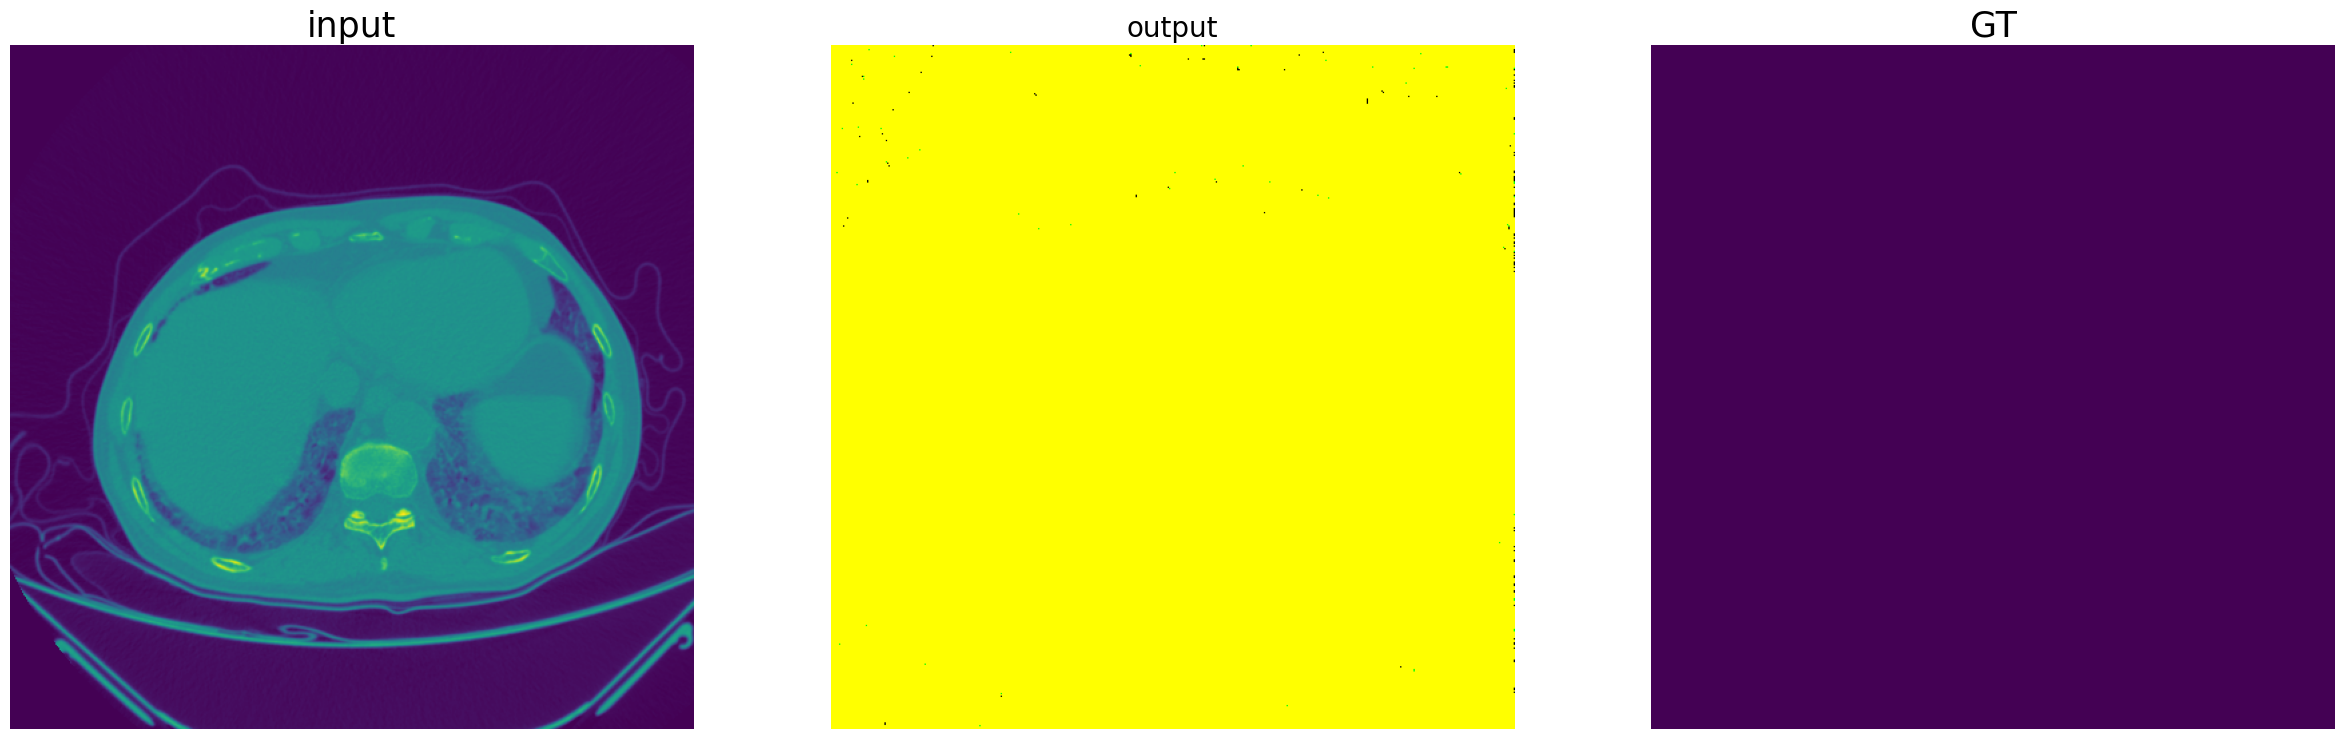

In [74]:
plt.figure(figsize=(30,15))

plt.subplot(1,3,1)
plt.imshow(np.array(Image.open(input[10])))
plt.title('input',fontdict={'fontsize': 25})
plt.axis('off')

plt.subplot(1,3,2)
result_img = np.array(Image.open(label[7]))/255.0
thresh = np.zeros_like(result_img)
thresh[result_img > 0.85] = 1

plt.imshow(thresh)
plt.title('output',fontdict={'fontsize': 20})
plt.axis('off')
    
plt.subplot(1,3,3)
plt.imshow(np.array(Image.open(GT[7])))
plt.title('GT',fontdict={'fontsize': 25})
plt.axis('off')